# Overview and Motivation: 
Our project was primarily motivated by the curiosity of how the stock market would look like today if COVID-19 never happened. This led us into studying and applying various stock prediction methodologies to find what would have been an accurate prediction and compare that to reality. We sought to measure the exact impact that COVID-19 had on the stock market and to analyze what makes certain prediction algorithms stronger than others.

# Initial Questions: 
The central question that we want to answer is "How would the stock market look like if COVID-19 never happened?" which was later refined to "How big of an impact did COVID-19 have on the stock market?" Throughout the project, that intial question changed to what it is now mainly due to the nature of the prediction algrothms used. We could not guarantee 100% accuracy of a scenario that never happened, but instead follow the trends that led up to COVID-19 and continue them to analyze the impact it has. Afterwards, that led us to several new questions that focus on the prediction algorithms themselves  such as:
What prediction algorithms seem the most realistic?
Can a prediction algorithm predict large scale events like COVID-19?

# Data:
Source: We decided to used SP500 and Dow Jones Industrial Average since they most accurately reflect an overview of how the stock market was affected for small-cap/mid-cap companies and large/mega-cap companies, respectively. We got our data from Yahoo Finance and specifically used the historical daily data from January 3, 2000 to October 28, 2020.
Cleaning: The data from Yahoo Finance was comprehensive and complete, only missing the expected weekends and holidays due to the stock market being closed. As a result, the only data cleaning necessary was clearing the extra information provided since only the High and Low values for each day were used to caluate a High-Low average for each day (this value is the primary value used in the analysis).

# Exploratory Data Analysis: 
The primary visualization used is various line graphs since every aspect of our project involves change over time. As a result, the main challenge was finding a way to display this information in a meaningful way. Our group decided on simply overlaying predictions with real data, indicating what data was used for training and what data is used to compare reality against the predictions. Additionally, predictions lead into December 31, 2020 despite true data stopping at October 28, 2020 for the purpose of visibility. Regarding the algorithms used, we had initially considered including an exponential growth within these predictions but ultimately decided against them since it implies constantly increasing growth when that rarely seems to be the case in the long term.

In [67]:
import pandas as pd
from pandas.tseries.holiday import USFederalHolidayCalendar
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates
import datetime as dt
import random

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

# Moving Average

We decided on trying to predict with the rolling average because we wanted to initially start with a naive approach to predicting the stock market. We wanted to see how this naive approach to forecasting would've compared to more complex ways of predicting stock market trends and as the results show, the rolling average simply gives a straight line for the prediction because it will calculate the average of a certain period of time and that would be the "prediction".

To predict using the simple moving average, we simply gathered the data within a certain time period
and calculated its average within its time period and that was the prediction going forward.
This was a very naive approach considering all this forecasting did was to get the average and use it to "predict".
To clean the data, we had to create a new row that was the average of the high and low costs of the stock per day.
We also ignored every other stat as it was in order. Then we ran the function in Pandas library rolling to calculate
the rolling average. We also decided to change the window sizes for the rolling average to give the user a
perspective on how it changes with a bigger or smaller period of time.

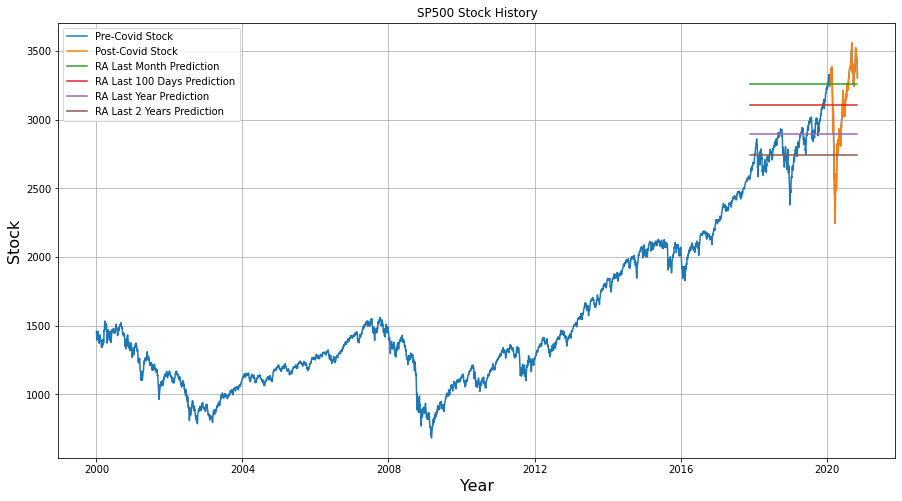

In [82]:
data = pd.read_csv("sp500.csv")
df = pd.DataFrame(data)
df['HL Avg'] = (df.High + df.Low)/ 2

train = df[0:5051]
test = df[4500:]
post = df[5051:]

y_hat = test.copy()
y_hat['SMA_30'] = train['HL Avg'].rolling(30).mean().iloc[-1]
y_hat['SMA_100'] = train['HL Avg'].rolling(100).mean().iloc[-1]
y_hat['SMA_365'] = train['HL Avg'].rolling(365).mean().iloc[-1]
y_hat['SMA_730'] = train['HL Avg'].rolling(730).mean().iloc[-1]

plt.figure(figsize=[15,8])
positions = (0, 1004,2010,3019,4025,5031)
labels = ("2000","2004","2008","2012","2016","2020")
plt.xticks(positions,labels)
plt.title("SP500 Stock History")
plt.ylabel("Stock").set_fontsize(16)
plt.xlabel("Year").set_fontsize(16)
plt.plot(df.index, df['HL Avg'], label='Pre-Covid Stock')
plt.plot(post.index, post['HL Avg'], label='Post-Covid Stock')
plt.plot(y_hat.index, y_hat['SMA_30'], label='RA Last Month Prediction')
plt.plot(y_hat.index, y_hat['SMA_100'], label='RA Last 100 Days Prediction')
plt.plot(y_hat.index, y_hat['SMA_365'], label='RA Last Year Prediction')
plt.plot(y_hat.index, y_hat['SMA_730'], label='RA Last 2 Years Prediction')
plt.legend(loc="best")
plt.grid()
plt.show()

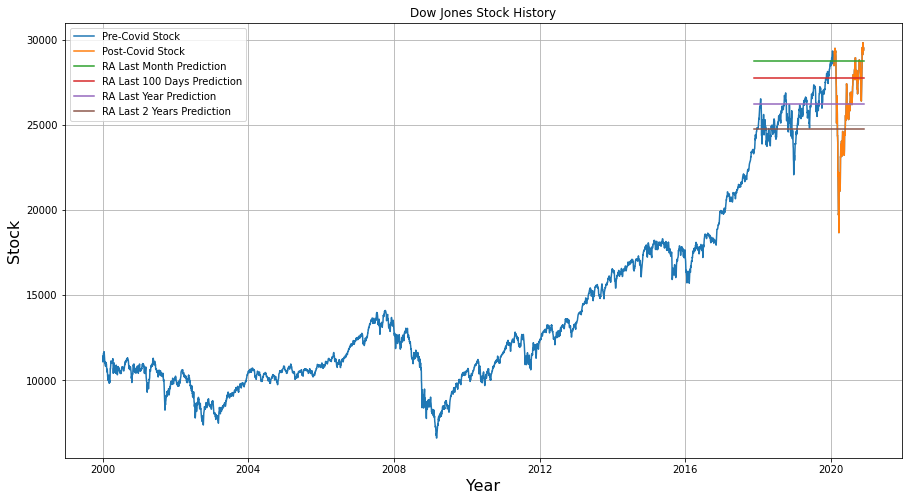

In [81]:
data = pd.read_csv("DOW_JONES.csv")
df = pd.DataFrame(data)
df['HL Avg'] = (df.High + df.Low)/ 2

train = df[0:5051]
test = df[4500:]
post = df[5051:]

y_hat = test.copy()
y_hat['SMA_30'] = train['HL Avg'].rolling(30).mean().iloc[-1]
y_hat['SMA_100'] = train['HL Avg'].rolling(100).mean().iloc[-1]
y_hat['SMA_365'] = train['HL Avg'].rolling(365).mean().iloc[-1]
y_hat['SMA_730'] = train['HL Avg'].rolling(730).mean().iloc[-1]

plt.figure(figsize=[15,8])
positions = (0, 1004,2010,3019,4025,5031)
labels = ("2000","2004","2008","2012","2016","2020")
plt.xticks(positions,labels)
plt.title("Dow Jones Stock History")
plt.ylabel("Stock").set_fontsize(16)
plt.xlabel("Year").set_fontsize(16)
plt.plot(df.index, df['HL Avg'], label='Pre-Covid Stock')
plt.plot(post.index, post['HL Avg'], label='Post-Covid Stock')
plt.plot(y_hat.index, y_hat['SMA_30'], label='RA Last Month Prediction')
plt.plot(y_hat.index, y_hat['SMA_100'], label='RA Last 100 Days Prediction')
plt.plot(y_hat.index, y_hat['SMA_365'], label='RA Last Year Prediction')
plt.plot(y_hat.index, y_hat['SMA_730'], label='RA Last 2 Years Prediction')
plt.legend(loc="best")
plt.grid()
plt.show()

# Linear Regression

We decided to use linear regression due to its simplicity since it would provide a basic model to compare against for a more complex model. Additionally, since it is extremely likely that a linear regression is unable to predict sudden drops in stock prices, it would provide a decent prediction of how the stock market could have behaved if COVID-19 had never affected the stock market.

Defining libraries used, reading in data for DJI (Dow Jones Industrial Average), and defining different training windows for the linear regression prediction. Also reading in data for SP500 and defining different training windows for the linear regression prediction.

In [71]:
DJI = pd.read_csv('DJI.csv')
DJI['HLavg'] = DJI[["High", "Low"]].astype(float).mean(axis=1)
DJI["Date"] = pd.to_datetime(DJI["Date"])
DJI = DJI.set_index(DJI["Date"])
DJItoday = pd.read_csv("DJItoday.csv")
DJItoday['HLavg'] = DJItoday[["High", "Low"]].astype(float).mean(axis=1)
DJItoday["Date"] = pd.to_datetime(DJItoday["Date"])
DJItoday = DJItoday.set_index(DJItoday["Date"])
DJI_2009 = DJI.drop(DJI.index[0:2305])
DJI_2016 = DJI.drop(DJI.index[0:4040])
SP500 = pd.read_csv('SP500_lr.csv')
SP500['HLavg'] = SP500[["High", "Low"]].astype(float).mean(axis=1)
SP500["Date"] = pd.to_datetime(SP500["Date"])
SP500 = SP500.set_index(SP500["Date"])
SP500today = pd.read_csv("SP500today_lr.csv")
SP500today['HLavg'] = SP500today[["High", "Low"]].astype(float).mean(axis=1)
SP500today["Date"] = pd.to_datetime(SP500today["Date"])
SP500today = SP500today.set_index(SP500today["Date"])
SP500_2009 = SP500.drop(SP500.index[0:2305])
SP500_2016 = SP500.drop(SP500.index[0:4040])

Defining dates to be used for predictions

In [ ]:
predictionDates = pd.date_range(start="2000-01-03",end="2020-12-31")
predictionDates2009 = pd.date_range(start="2009-03-05",end="2020-12-31")
predictionDates2016 = pd.date_range(start="2016-01-26",end="2020-12-31")
pred = []
for date in predictionDates:
    pred.append([date.toordinal()])
pred2009 = []
for date in predictionDates2009:
    pred2009.append([date.toordinal()])
pred2016 = []
for date in predictionDates2016:
    pred2016.append([date.toordinal()])

Intializing the linear regression model, training it with data from Dow Jones data, and graphing the results

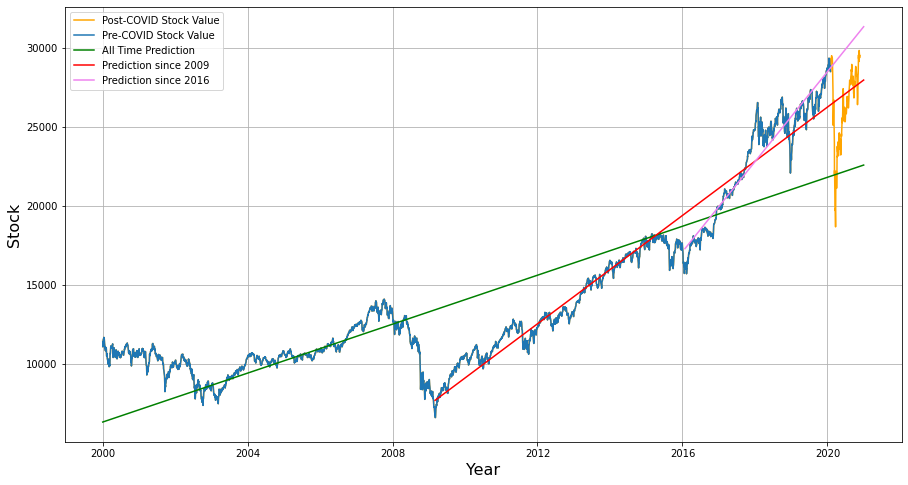

In [77]:
DJIline = LinearRegression()
DJI["Ordinal"] = DJI["Date"].map(dt.datetime.toordinal)
DJIline.fit(DJI[["Ordinal"]], DJI[["HLavg"]])
DJIpredict = DJIline.predict(pred)

DJI_2009line = LinearRegression()
DJI_2009["Ordinal"] = DJI_2009["Date"].map(dt.datetime.toordinal)
DJI_2009line.fit(DJI_2009[["Ordinal"]], DJI_2009[["HLavg"]])
DJI_2009predict = DJI_2009line.predict(pred2009)

DJI_2016line = LinearRegression()
DJI_2016["Ordinal"] = DJI_2016["Date"].map(dt.datetime.toordinal)
DJI_2016line.fit(DJI_2016[["Ordinal"]], DJI_2016[["HLavg"]])
DJI_2016predict = DJI_2016line.predict(pred2016)

plt.figure(figsize=(15,8))
plt.plot(DJItoday["Date"], DJItoday["HLavg"], label="Post-COVID Stock Value", color="orange")
plt.plot(DJI["Date"], DJI["HLavg"], label="Pre-COVID Stock Value")
plt.plot(predictionDates, DJIpredict, label="All Time Prediction", color = "green")
plt.plot(predictionDates2009, DJI_2009predict, label="Prediction since 2009", color = "red")
plt.plot(predictionDates2016, DJI_2016predict, label="Prediction since 2016", color = "violet")

plt.legend(loc="best")
plt.xlabel('Year').set_fontsize(16)
plt.ylabel('Stock').set_fontsize(16)
plt.grid()

plt.show()

Intializing the linear regression model, training it with data from SP500 data, and graphing the results

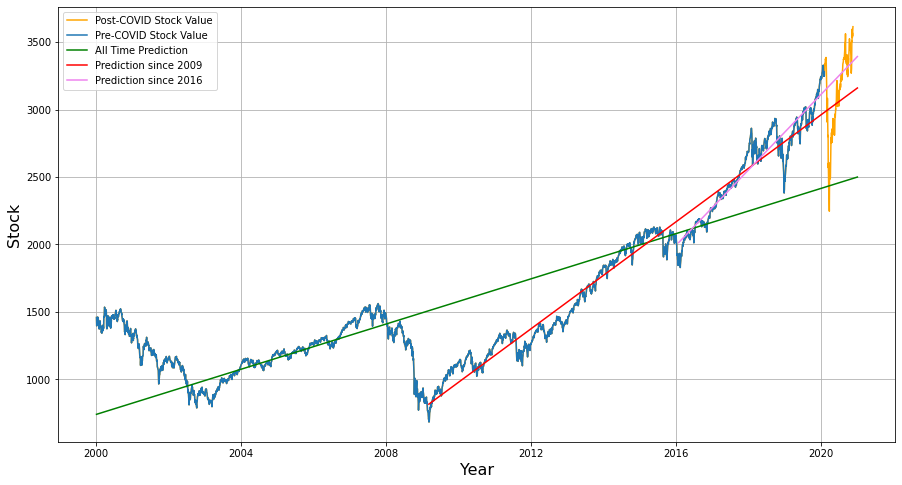

In [76]:
SP500line = LinearRegression()
SP500["Ordinal"] = SP500["Date"].map(dt.datetime.toordinal)
SP500line.fit(SP500[["Ordinal"]], SP500[["HLavg"]])
SP500predict = SP500line.predict(pred)

SP500_2009line = LinearRegression()
SP500_2009["Ordinal"] = SP500_2009["Date"].map(dt.datetime.toordinal)
SP500_2009line.fit(SP500_2009[["Ordinal"]], SP500_2009[["HLavg"]])
SP500_2009predict = SP500_2009line.predict(pred2009)

SP500_2016line = LinearRegression()
SP500_2016["Ordinal"] = SP500_2016["Date"].map(dt.datetime.toordinal)
SP500_2016line.fit(SP500_2016[["Ordinal"]], SP500_2016[["HLavg"]])
SP500_2016predict = SP500_2016line.predict(pred2016)

plt.figure(figsize=(15,8))
plt.plot(SP500today["Date"], SP500today["HLavg"], label="Post-COVID Stock Value", color="orange")
plt.plot(SP500["Date"], SP500["HLavg"], label="Pre-COVID Stock Value")
plt.plot(predictionDates, SP500predict, label="All Time Prediction", color = "green")
plt.plot(predictionDates2009, SP500_2009predict, label="Prediction since 2009", color = "red")
plt.plot(predictionDates2016, SP500_2016predict, label="Prediction since 2016", color = "violet")

plt.legend(loc="best")
plt.xlabel('Year').set_fontsize(16)
plt.ylabel('Stock').set_fontsize(16)
plt.grid()

plt.show()

# LSTM

Lastly, we used an LSTM model to try and predict prices. LSTM stands for Long Short Term Memory and it is a type of neural network that specializes in time series data. LSTMS are more efficent at extracting information from sequences and order of data than most other models. This makes it well suited for tasks like predicting stocks, where one would need to look at trends over a period of time.

We start out by setting a seed for any randomness used in our code. Neural networks utilize randomness by determine a random set of initial conditions before updating weights through the process of learning. By setting our seed, we hope to achieve a sense of reproducibility in our experiment. 

After running our tests multiple times, it seems that our results are still differing from one another even though inputs and parameters stay the same. Research online shows that results can differ based on the computer that runs the program, more specifically what CPUs/GPUs run the program. There are also other circumstances that can affect the reproducibilty of results.

https://stackoverflow.com/questions/50659482/why-cant-i-get-reproducible-results-in-keras-even-though-i-set-the-random-seeds
https://keras.io/getting_started/faq/#how-can-i-obtain-reproducible-results-using-keras-during-development

In [3]:
np.random.seed(1)
tf.random.set_seed(1)
random.seed(1)

format_data:
The purpose of this function is to transform data into a format that the LSTM model will be able to use. Our input for our model will be the stock prices of a number of consecutive days and the output will be the stock price of the next day. Receiving the data along with a look_back window as input, the function will loop through the data capturing windows of data and putting that into a numpy array. The array is then transformed into 3 dimension so that it can be used by the LSTM

Inputs:   data = [1, 2, 3, 4] window = 2
Outputs:  x = [[1, 2], [2, 3]]  y = [3, 4]


get_year_index:
This function gets us the index of the first business day of every year. We want to predict every year so this function will help us with lining up our predictions with the correct date on our graph.


create_model:
This function creates a new model every time it is called. It is creating a model based on global constants that we swap and change out during testing to try and find the best model.

In [11]:
def format_data(data, timestep):
    x, y = [], []
    for i in range(len(data) - 1 - timestep):
        x.append(data[i:i + timestep])
        y.append(data[i + timestep])
    
    x = np.array(x).reshape(len(x), timestep, 1)
    y = np.array(y)
    
    return x, y

def get_year_index():
    def get_business_day(date):
        while date.isoweekday() > 5 or date in cal.holidays():
            date += dt.timedelta(days=1)
        return date
    cal = USFederalHolidayCalendar()
    start_date = '2000-01-01'
    end_date = '2020-01-01'

    year_beginning_dates = [get_business_day(d).date().strftime('%Y-%m-%d') for d in pd.date_range(start_date, end_date, freq='BAS')]
    year_beginning_dates[7] = '2007-01-03'
    year_beginning_indices = []
    for date in year_beginning_dates:
        year_beginning_indices.append(int(df['Date'][df['Date'] == date].index[0]))
    year_beginning_indices = year_beginning_indices[11:]
    return year_beginning_indices

def create_model():
    model = Sequential()
    model.add(LSTM(NUM_NODES[0], return_sequences=True, input_shape=(LOOK_BACK, 1)))
    model.add(Dropout(DROPOUT))
    for i in range(1, NUM_LAYERS):
        model.add(LSTM(NUM_NODES[i], return_sequences=(False if i == NUM_LAYERS - 1 else True)))
        model.add(Dropout(DROPOUT))
    model.add(Dense(1, activation=ACTIVATION))
    model.compile(loss=LOSS, optimizer=OPTIMIZER)
    return model

This is where we set global parameters on which we use to train our model. Here are some of the variables explained.
- Window size: determines the rolling average window.
- Look back: determines how many days the model looks back when predicting the next day's value.
- Predict forward: how far in the future the model predicts.

In [16]:
WINDOW_SIZE = 150
LOOK_BACK = 60
PREDICT_FORWARD = 120
NUM_EPOCHS = 20
NUM_BATCH_SIZE = 50
NUM_LAYERS = 2
NUM_NODES = [128, 256]
DROPOUT = 0.2
OPTIMIZER = 'adam'
ACTIVATION = 'relu'
LOSS = 'mean_squared_error'

# Data Preprocessing

For this model, we opted to use the values of a rolling average to train the model and predict from. Our reasoning for this decision was mainly to try and reduce noise in our data with the hopes of improving performance of our model. We did try to test the model without a rolling average and the results were all over the place and didn't show a consistant pattern. We realize that this does remove some the granualarity that shows how impactful COVID was to the 2020 economy. However, because we were interested in the overall trends, we thought that it was acceptable to use a rolling average.

We also decided to normalize the values of the stock to a range between 0 and 1 to make it more consistent and easy to work with. As for the value from which we are predicting, we decided to go with an average between the high and low stock value of the day.

           Date         Open         High          Low        Close  \
5235 2020-10-22  3438.500000  3460.530029  3415.340088  3453.489990   
5236 2020-10-23  3464.899902  3466.459961  3440.449951  3465.389893   
5237 2020-10-26  3441.419922  3441.419922  3364.860107  3400.969971   
5238 2020-10-27  3403.149902  3409.510010  3388.709961  3390.679932   
5239 2020-10-28  3342.479980  3342.479980  3268.889893  3271.030029   

        Adj Close      Volume          HLA     HLA_R150  HLA_R150_Normalized  
5235  3453.489990  4163630000  3437.935059  3130.006661             0.988840  
5236  3465.389893  3646570000  3453.454956  3138.054394             0.992330  
5237  3400.969971  3988080000  3403.140014  3144.761494             0.995239  
5238  3390.679932  3946990000  3399.109986  3150.825728             0.997870  
5239  3271.030029  5129860000  3305.684936  3155.737861             1.000000  


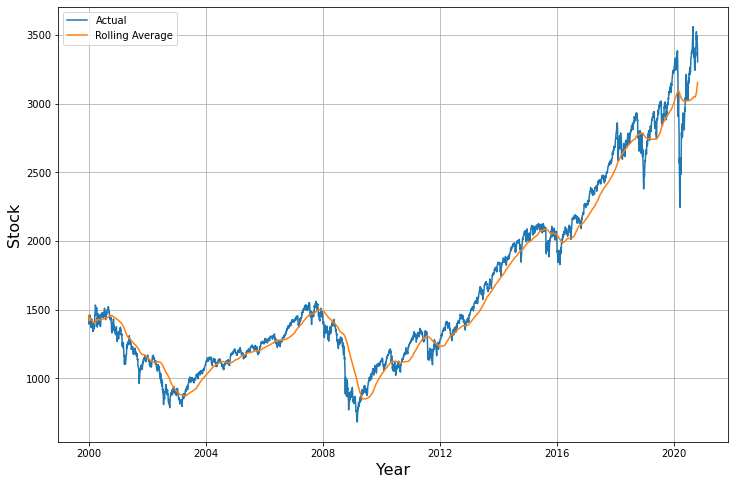

In [61]:
df = pd.read_csv('SP500.csv')
df['Date'] = df['Date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
df['HLA'] = (df['High'] + df['Low']) / 2
scaler = MinMaxScaler()
df['HLA_R' + str(WINDOW_SIZE)] = df['HLA'].rolling(window=WINDOW_SIZE, min_periods=1).mean()
df['HLA_R' + str(WINDOW_SIZE) + '_Normalized'] = scaler.fit_transform(np.array(df['HLA_R' + str(WINDOW_SIZE)]).reshape(-1, 1))

print(df.tail())

plt.figure(figsize=(12,8))
plt.plot(df['Date'], df['HLA'], label='Actual')
plt.plot(df['Date'], df['HLA_R' + str(WINDOW_SIZE)], label='Rolling Average')
plt.legend(loc="best")
plt.xlabel('Year').set_fontsize(16)
plt.ylabel('Stock').set_fontsize(16)
plt.grid()
plt.show()

We get the indices for the first business day for years 2011 - 2020. This reasoning will become apparent in a future section

In [50]:
year_beginning_indices = get_year_index()

There is a function in sklearn called GridSearchCV that allows you to find the best set of hyperparameters for your model. The general idea of the function is to fit the model on every combination of hyperparameters that you specified and return a set of hyperparameters that performed the best. This way, programmers wouldn't have to repeatedly change parameters and retest.

We tried to utilize this function but it would continue to crash in the middle of the night without any usuable results. However, we included it here as a way to show that there are ways to train a model in one go if you have good intuition of the general values of your hyperparameters.

In [ ]:
model = KerasRegressor(build_fn=create_model, verbose=0)
batch_size = [16, 32, 64, 128]
epochs = [20, 40, 60, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
x_train, y_train = format_data(df['HLA_R' + str(WINDOW_SIZE) + '_Normalized'].tolist()[:year_beginning_indices[-1]], LOOK_BACK)
grid_result = grid.fit(x_train, y_train)

# Training and Predictions

In this section, we initialize the data and began to train the model. We also made predictions for each year starting in 2011. The model was trained on nearly all the data. This is because we are planning on using a form of cross validation later on to determine the performance of our model.

In [18]:
model = create_model()
print(model.summary())
x_train, y_train = format_data(df['HLA_R' + str(WINDOW_SIZE) + '_Normalized'].tolist()[:year_beginning_indices[-1]], LOOK_BACK)
x_test, y_test = format_data(df['HLA_R' + str(WINDOW_SIZE) + '_Normalized'].tolist()[year_beginning_indices[-1]:], LOOK_BACK)
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=NUM_EPOCHS, batch_size=NUM_BATCH_SIZE, verbose=1)

predictions = []
for j in year_beginning_indices:
    temp_data = df['HLA_R' + str(WINDOW_SIZE) + '_Normalized'].tolist()[j - LOOK_BACK - 2: j]
    inputs, _ = format_data(temp_data, LOOK_BACK)
    prediction = []
    for i in range(PREDICT_FORWARD):
        single_prediction = model.predict(inputs)
        temp_data = temp_data[1:]
        temp_data.append(single_prediction[0][0])
        inputs, _ = format_data(temp_data, LOOK_BACK)
        prediction.append(single_prediction[0][0]) 
    predictions.append(prediction)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 60, 128)           66560     
_________________________________________________________________
dropout_4 (Dropout)          (None, 60, 128)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 256)               394240    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 461,057
Trainable params: 461,057
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
100/100 [==============================] - 32s 318ms/step - loss: 0.0035 - val_loss: 2.3658e-04
Ep

We plotted the data in this cell. We trained this model multiple times on many different parameters, and this was one of the best results we achieved. The model seemed to have continous upward trend all the way through and starts to plateau around 2019-2020. Analysis will be done at the end.

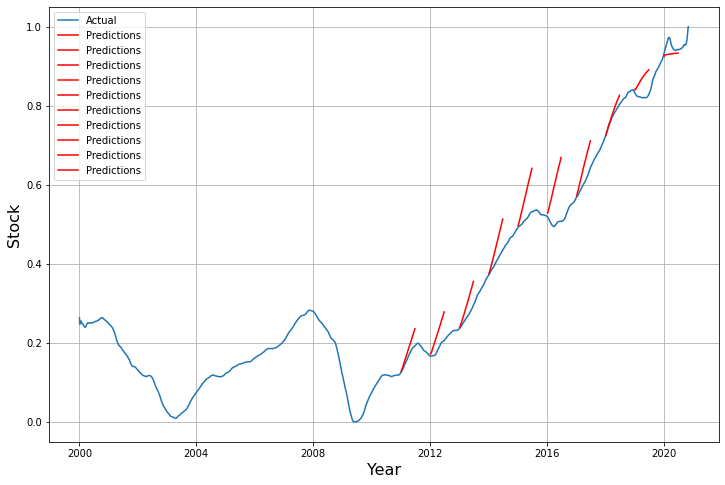

In [19]:
plt.figure(figsize=(12,8))
plt.plot(df['Date'], df['HLA_R' + str(WINDOW_SIZE) + '_Normalized'], label='Actual')
for i in range(len(year_beginning_indices)):
    plt.plot(df['Date'].iloc[year_beginning_indices[i]:year_beginning_indices[i] + PREDICT_FORWARD], predictions[i], label='Predictions', color='red')
plt.legend(loc="best")
plt.xlabel('Year').set_fontsize(16) # x label
plt.ylabel('Stock').set_fontsize(16) # y label
plt.grid() # show grid
plt.show()

This is just a zoomed in version of the graph above so that we can visualize 2020 is a clearer way. Seeing the results in this light, you can really see how much the rolling average minimized the impact of COVID. The original graph of the stocks had COVID at a much sharper drop than this.

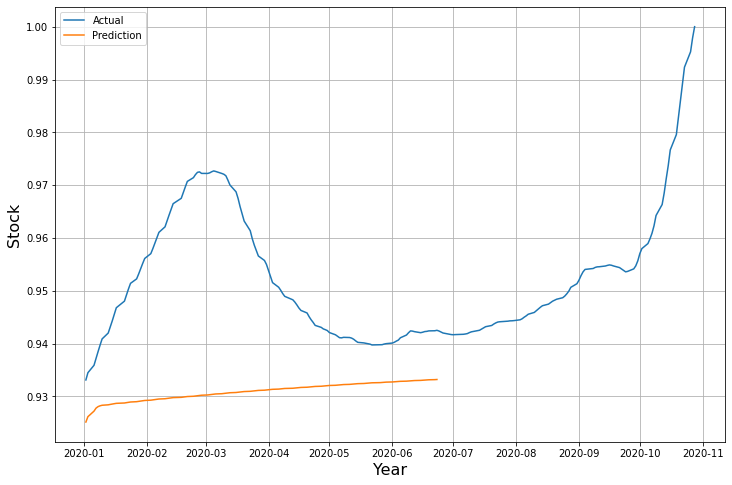

In [47]:
plt.figure(figsize=(12,8))
plt.plot(df['Date'].iloc[year_beginning_indices[-1]:], df['HLA_R' + str(WINDOW_SIZE) + '_Normalized'].iloc[year_beginning_indices[-1]:], label='Actual')
plt.plot(df['Date'].iloc[year_beginning_indices[-1]:year_beginning_indices[-1] + PREDICT_FORWARD], predictions[-1], label='Prediction')
plt.legend(loc="best")
plt.xlabel('Year').set_fontsize(16)
plt.ylabel('Stock').set_fontsize(16)
plt.grid()
plt.show()

This is the loss and validation loss of our model as it was being trained. In general it looks like both loss and validation loss decreased over time which is a good sign of the model learning.

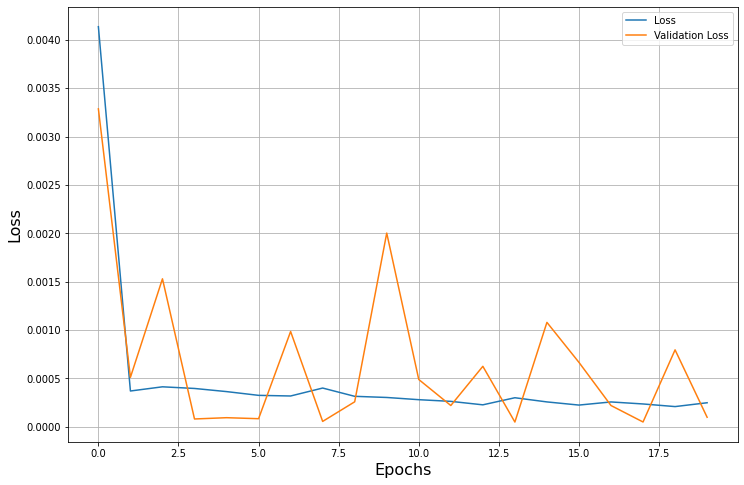

In [58]:
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc="best")
plt.xlabel('Epochs').set_fontsize(16) # x label
plt.ylabel('Loss').set_fontsize(16) # y label
plt.grid() # show grid
plt.show()

In this section, we utilize a variant of K-fold cross validation to evaluate our model. Because our data was time series data, we wanted to avoid random smapling since we wanted our network to extract information from the order of our data. Keep in mind that this is only an evaluation of the one day prediction that our model made.

The way that we set up our cross validation was to train multiple models on varying amounts of data:

Fold 1) train = [2000 ... 2011], test = [2011]

Fold 2) train = [2000 ... 2012], test = [2012]

...

Fold 9) train = [2000 ... 2019], test = [2020]

We average the results of the evaluations from all of these models and used those totals to determine the overal performance of our model

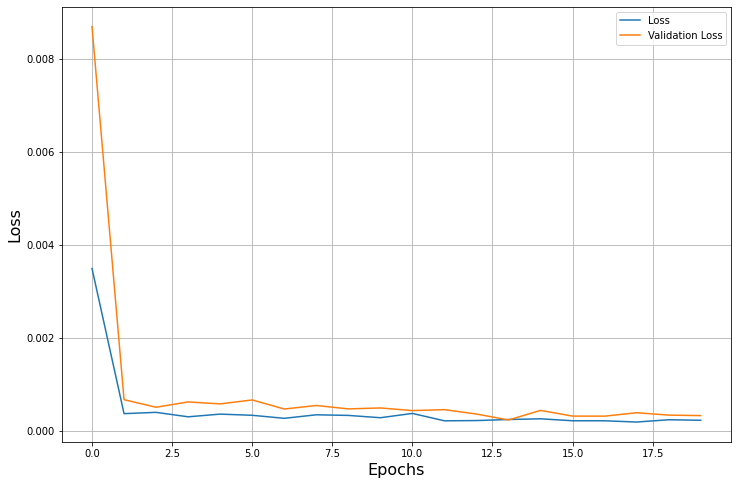

In [44]:
histories = []
for i in range(len(year_beginning_indices) - 1):
    model = create_model()
    x_train, y_train = format_data(df['HLA_R' + str(WINDOW_SIZE) + '_Normalized'].tolist()[:year_beginning_indices[i]], LOOK_BACK)
    x_test, y_test = format_data(df['HLA_R' + str(WINDOW_SIZE) + '_Normalized'].tolist()[year_beginning_indices[i]:year_beginning_indices[i+1]], LOOK_BACK)
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=NUM_EPOCHS, batch_size=NUM_BATCH_SIZE, verbose=0)
    histories.append(history)
    
length = len(histories[0].history['loss'])
avg_loss = [0 for i in range(length)]
avg_valloss = [0 for i in range(length)]

for i in histories:
    for j in range(length):
        avg_loss[j] += i.history['loss'][j]
        avg_valloss[j] += i.history['val_loss'][j]

for i in range(length):
    avg_loss[i] /= len(histories)
    avg_valloss[i] /= len(histories)

plt.figure(figsize=(12,8))
plt.plot(avg_loss, label='Loss')
plt.plot(avg_valloss, label='Validation Loss')
plt.legend(loc="best")
plt.xlabel('Epochs').set_fontsize(16)
plt.ylabel('Loss').set_fontsize(16)
plt.grid()
plt.show()

This following section repeats the above steps for the stocks of Dow Jones

In [52]:
df = pd.read_csv('DOW_JONES.csv')
df['Date'] = df['Date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
df['HLA'] = (df['High'] + df['Low']) / 2
scaler = MinMaxScaler()
df['HLA_R' + str(WINDOW_SIZE)] = df['HLA'].rolling(window=WINDOW_SIZE, min_periods=1).mean()
df['HLA_R' + str(WINDOW_SIZE) + '_Normalized'] = scaler.fit_transform(np.array(df['HLA_R' + str(WINDOW_SIZE)]).reshape(-1, 1))
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,HLA,HLA_R150,HLA_R150_Normalized
0,2000-01-03,11501.849609,11522.009766,11305.690430,11357.509766,11357.509766,169750000,11413.850098,11413.850098,0.169279
1,2000-01-04,11349.750000,11350.059570,10986.450195,10997.929688,10997.929688,178420000,11168.254882,11291.052490,0.162960
2,2000-01-05,10989.370117,11215.099609,10938.669922,11122.650391,11122.650391,203190000,11076.884765,11219.663249,0.159287
3,2000-01-06,11113.370117,11313.450195,11098.450195,11253.259766,11253.259766,176550000,11205.950195,11216.234985,0.159111
4,2000-01-07,11247.059570,11528.139648,11239.919922,11522.559570,11522.559570,184900000,11384.029785,11249.793945,0.160837


In [53]:
model = create_model()
print(model.summary())
x_train, y_train = format_data(df['HLA_R' + str(WINDOW_SIZE) + '_Normalized'].tolist()[:year_beginning_indices[-1]], LOOK_BACK)
x_test, y_test = format_data(df['HLA_R' + str(WINDOW_SIZE) + '_Normalized'].tolist()[year_beginning_indices[-1]:], LOOK_BACK)
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=NUM_EPOCHS, batch_size=NUM_BATCH_SIZE, verbose=1)

predictions = []
for j in year_beginning_indices:
    temp_data = df['HLA_R' + str(WINDOW_SIZE) + '_Normalized'].tolist()[j - LOOK_BACK - 2: j]
    inputs, _ = format_data(temp_data, LOOK_BACK)
    prediction = []
    for i in range(PREDICT_FORWARD):
        single_prediction = model.predict(inputs)
        temp_data = temp_data[1:]
        temp_data.append(single_prediction[0][0])
        inputs, _ = format_data(temp_data, LOOK_BACK)
        prediction.append(single_prediction[0][0]) 
    predictions.append(prediction)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 60, 128)           66560     
_________________________________________________________________
dropout_6 (Dropout)          (None, 60, 128)           0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 256)               394240    
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 461,057
Trainable params: 461,057
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
100/100 [==============================] - 34s 335ms/step - loss: 0.0041 - val_loss: 2.8562e-04
Ep

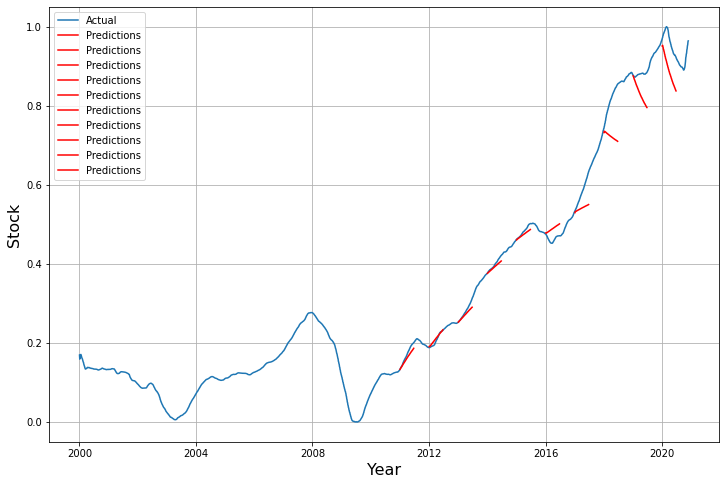

In [54]:
plt.figure(figsize=(12,8))
plt.plot(df['Date'], df['HLA_R' + str(WINDOW_SIZE) + '_Normalized'], label='Actual')
for i in range(len(year_beginning_indices)):
    plt.plot(df['Date'].iloc[year_beginning_indices[i]:year_beginning_indices[i] + PREDICT_FORWARD], predictions[i], label='Predictions', color='red')
plt.legend(loc="best")
plt.xlabel('Year').set_fontsize(16) # x label
plt.ylabel('Stock').set_fontsize(16) # y label
plt.grid() # show grid
plt.show()

# LSTM Analysis

- __Overview__:
    Overal, we thought that the LSTM model did decently well. For both SP500 and Dow Jones, it seems to have predicted a downturn or at least a plateau in the stock market. Our validation of our model also seem to display decent results. Our loss was always lower than our validation loss which is a sign that our model is not overfitted, and both loss decreased over time which points to our model learning over time. However, there are concerns about this discussed below. In conclusion, if we had more time, we could've continued to tune the hyperparameters of this model to better it's performance.

- __Challenges__:
    The main challenge that came with the LSTM model was the amount of time it took to repeatedly train models. Training time would average around 15 mins everytime we wanted to change a hyperparameter. Even with all 3 of our group mates testing the model on our different computers, training time was still immense. This also takes us to our second problem which is reproducibility of our results. When we were each testing the models on our computers, we would not be able to replicate what we had between our computers even though inputs and parameters were the same. Results were close but never exact which made it difficult for us to make decisions. Lastly, our validation data may not be representative of the whole model. Between 2000 and 2010, there were a varying amount of increases and decreases in stock price and that was the data that our model was trained on. However, price of stock seem to only increase from 2011 to 2020 which means that our validation did not have any decreases. This is worrying because our model evaluation may not accurately describe our model's performance and that our predictions may be overfitted.

- __Changes__:
    There were things that we would've like to done different it we had more time with this project. One of the main things was that our model was predicting one day ahead and we were making multiple predictions into the future to get our trends. One of the ways we could've done this differently was to have the output of the model be more than 1 day and make it so that we would only have to do 1 prediction to get the predictions of the next n days. The main reason why we didn't do this was because it was not using any of it's previous predictions in its future prediction. However, this could've been an advantage since it was not compounding the errors made in previous predictions.

# Final Analysis: 
The stock prediction algorithms used showed the initial impact of COVID-19 was undeniably massive. Almost universally, stock prices dropped almost 30% from what they were and could have been in practically a day. However, this intial impact seemed to be a relatively short-term effect that each prediction algorithm "predicted" differently. The rolling average expected stock prices to drop at some point, consistently remaining lower than the true data for several months until the end of its training data. This is expected, however, due to the upward trends of the stock market. Had COVID-19 never impacted the stock market, the rolling average would consistently remain below the end of its training data. The linear regression expected no change which seems horribly inaccurate at first, but is impressively correct in predicting stock trends after that initial COVID-19 drop. Linear regression seems to be focused on the long term in each of its predictions with the 2016 prediction most accurately following stock trends pre-COVID and real data showing that it is recovering to those predicted values at an impressive pace. Finally and most interestingly, the LTSM model expected a short term plateau or drop in stock values. It also gained an increasing amount of confidence in that prediction as the date approached the end of its training data as shown by the reducing upward trend and steeper downward trends. As a result, it's reasonable to assume that the LTSM model can predict relatively short-term events. However, this analysis isn't perfect since the LTSM model has to work off of a rolling average, meaning that it struggles to predict exactly how much of an impact COVID-19 will have in a single day, instead just expressing increasing confidence in a drop in prices. Revisiting the intitial questions, here are the conclusions we made:

How big of an impact did COVID-19 have on the stock market?
- The impact of COVID-19 was initially massive and unexpected by every prediction algorthm. However, the recovery process afterward seemed to follow the trend predicted by a linear regression algorithm while the drop itself was expected to occur according to the LTSM model (the exact impact or date of that drop was not able to be predicted, however).
What prediction algorithms seem the most realistic?
- The linear regression prediction algorithm seems appropriately follow a long-term trend, shown by its successful prediction of the recovery process after COVID-19. The LTSM model, on the other hand, seems to more accurately predict short-term trends, shown by its anticipation of a drop in stock prices in the dates leading to the initial COVID-19 stock price drop. As a result, both algorithms come at some kind of drawback, with the two forming a more complete prediction when considered together.
Can a prediction algorithm predict large scale events like COVID-19?
- On the short-term, possibly. Focusing on the LTSM model, it seems to be able to predict downwards trend successfully, but struggles to predict an exact date or the exact impact of that stock price drop due to the way it is trained with rolling averages. Other prediction algorithms tested focused on the long-term with complete ignorance of an possible events. As a result, the LTSM model proved to be more impressive than initially expected since it was able to "break away" from a strong upward trend to predict a sharp drop in stock prices.